# ADVANCED - EXPLANATORY MODEL ANALYSIS DEPENDENT

# Install & Load Package

In [ ]:
!pip install skope-rules
!pip install cubist
!pip install eli5
!pip install scikit-plot

     |████████████████████████████████| 489 kB 5.3 MB/s 
     |████████████████████████████████| 106 kB 5.4 MB/s 


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load random forest model
from sklearn.ensemble import RandomForestClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# marketing campaign
marketing_campaign = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv', sep=';')

In [ ]:
# check marketing_campaign
marketing_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Preprocessing Data

In [ ]:
# calculating age as it is in the year 2022
marketing_campaign['Age'] = 2022 - marketing_campaign['Year_Birth']

In [ ]:
# turn Education column into dummy variables
pd.get_dummies(marketing_campaign['Education'])
dummy_var1 = pd.get_dummies(marketing_campaign['Education'])[['2n Cycle','Basic','Graduation','Master','PhD']]
# check dummy_var1
dummy_var1

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2235,0,0,1,0,0
2236,0,0,0,0,1
2237,0,0,1,0,0
2238,0,0,0,1,0


In [ ]:
# turn Education column into dummy variables
pd.get_dummies(marketing_campaign['Marital_Status'])
dummy_var2 = pd.get_dummies(marketing_campaign['Marital_Status'])[['Absurd','Alone','Divorced','Married','Single','Together','Widow','YOLO']]
# check dummy_var2
dummy_var2

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,1,0,0,0,0
2236,0,0,0,0,0,1,0,0
2237,0,0,1,0,0,0,0,0
2238,0,0,0,0,0,1,0,0


In [ ]:
marketing_campaign = pd.concat([marketing_campaign, dummy_var1, dummy_var2], axis = 1)


In [ ]:
# remove ID, Year_Birth, Z_CostContact, Z_Revenue, Dt_Customer from dataset
marketing_campaign = marketing_campaign.drop(
    ['ID','Year_Birth','Education','Marital_Status', 'Income','Z_CostContact', 'Z_Revenue','Dt_Customer'],
    axis = 1
)

# check its first 5 rows
marketing_campaign.head()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,0,0,58,635,88,546,172,88,88,3,...,0,0,0,0,0,0,1,0,0,0
1,1,1,38,11,1,6,2,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,0,0,26,426,49,127,111,21,42,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,26,11,4,20,10,3,5,2,...,0,0,0,0,0,0,0,1,0,0
4,1,0,94,173,43,118,46,27,15,5,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# count 'Response' class frequencies
marketing_campaign['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

## 1.Simple EDA

In [ ]:
# check correlation matrix of marketing_campaign
marketing_campaign.corr()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Kidhome,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,...,0.008146,-0.042013,-0.024669,0.037813,-0.019199,0.017403,0.019779,0.006373,-0.073760,-0.024669
Teenhome,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,...,0.023601,0.089451,-0.027798,0.010791,0.052613,0.007749,-0.095925,0.025038,0.045093,0.027112
Recency,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,...,-0.023394,-0.011377,0.004017,-0.023746,0.004434,-0.022757,0.007158,0.020363,0.000218,-0.047603
MntWines,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,...,0.038517,0.157295,0.004581,-0.012979,0.021120,-0.010491,-0.024216,0.005077,0.036632,0.001605
MntFruits,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,...,-0.051996,-0.082772,0.043752,-0.020539,0.009612,-0.011304,0.007002,-0.014155,0.032211,-0.017518
MntMeatProducts,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,...,-0.007040,0.003855,0.019281,-0.022819,-0.025219,-0.022011,0.035079,0.003021,0.018675,-0.015492
MntFishProducts,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,...,-0.044186,-0.104060,0.091940,-0.020020,-0.015449,-0.031116,0.006609,0.015865,0.047894,-0.018350
MntSweetProducts,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,...,-0.063452,-0.087248,0.002490,-0.017802,-0.002009,-0.006942,0.002525,-0.013471,0.054631,-0.017430
MntGoldProds,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.049085,...,-0.030913,-0.118196,0.091694,-0.011952,0.014774,-0.018216,-0.002931,-0.011640,0.046103,-0.001159
NumDealsPurchases,0.221798,0.387741,-0.001098,0.010940,-0.132114,-0.122415,-0.139361,-0.120100,0.049085,1.000000,...,0.023493,0.013484,-0.005029,0.025434,0.019416,0.027631,-0.052377,-0.000264,0.001237,0.041395


### Interpretasi

Hasil analisis korelasi diatas menunjukkan bahwa hubungan variabel "AcceptedCmp5" dengan "Response" memiliki nilai koefisien tertinggi dibandingkan dengan variabel lain yaitu sebesar 0.33 artinya seseorang merespon penawaran campaign ke-5 dari tim marketing. Mungkin pada campaign ke-5 tim marketing menawarkan campaign yang menarik bagi seseorang dibandingakan campaign yang lain.

## 2.Machine Learning Model

**Train-Test Split**

In [ ]:
y = marketing_campaign['Response'].values
X = marketing_campaign.drop(['Response'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
X

array([[ 0,  0, 58, ...,  0,  0,  0],
       [ 1,  1, 38, ...,  0,  0,  0],
       [ 0,  0, 26, ...,  1,  0,  0],
       ...,
       [ 0,  0, 91, ...,  0,  0,  0],
       [ 0,  1,  8, ...,  1,  0,  0],
       [ 1,  1, 40, ...,  0,  0,  0]])

In [ ]:
X_train.shape

(1568, 34)

In [ ]:
X_test.shape

(672, 34)

In [ ]:
y_train.shape

(1568,)

In [ ]:
y_test.shape

(672,)

### Linear Regression

**Linear Regression Modeling using StatsModel**

In [ ]:
y = marketing_campaign['Response'].values
X = marketing_campaign.drop(['Response'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
# Modeling
X_train_int = sm.add_constant(X_train)
linear_reg_sm = sm.OLS(y_train, X_train_int).fit()

In [ ]:
# check model summary
linear_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     25.12
Date:                Wed, 20 Apr 2022   Prob (F-statistic):          8.14e-117
Time:                        02:59:03   Log-Likelihood:                -276.66
No. Observations:                1568   AIC:                             619.3
Df Residuals:                    1535   BIC:                             796.1
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1341      0.054      2.475      0.013       0.028       0.240
x1            -0.0052      0.019     -0.274      0.784      -0.042       0.032
x2            -0.0569      0.017     -3.294      0.001      -0.091      -0.023
x3            -0.0022      0.000     -8.467      0.000      -0.003      -0.002
x4         -2.178e-05   4.01e-05     -0.543      0.587      -0.000    5.69e-05
x5             0.0004      0.000      1.600      0.110   -9.27e-05       0.001
x6             0.0004   5.75e-05      6.323      0.000       0.000       0.000
x7         -7.736e-05      0.000     -0.387      0.699      -0.000       0.000
x8            -0.0002      0.000     -0.634      0.526      -0.001       0.000
x9          6.753e-05      0.000      0.393      0.694      -0.000       0.000
x10            0.0166      0.005      3.283      0.001       0.007       0.027
x11            0.0071      0.004      2.018      0.044       0.000       0.014
x12            0.0050      0.004      1.129      0.259      -0.004       0.014
x13           -0.0163      0.003     -4.718      0.000      -0.023      -0.010
x14            0.0162      0.004      3.753      0.000       0.008       0.025
x15            0.2533      0.029      8.653      0.000       0.196       0.311
x16            0.1114      0.032      3.477      0.001       0.049       0.174
x17            0.2515      0.037      6.863      0.000       0.180       0.323
x18            0.2213      0.035      6.287      0.000       0.152       0.290
x19            0.1356      0.067      2.031      0.042       0.005       0.267
x20           -0.0264      0.074     -0.357      0.721      -0.172       0.119
x21            0.0009      0.001      1.276      0.202      -0.000       0.002
x22            0.0228      0.026      0.889      0.374      -0.027       0.073
x23           -0.0458      0.041     -1.117      0.264      -0.126       0.035
x24            0.0193      0.018      1.101      0.271      -0.015       0.054
x25            0.0486      0.021      2.280      0.023       0.007       0.091
x26            0.0892      0.020      4.372      0.000       0.049       0.129
x27            0.0196      0.191      0.103      0.918      -0.355       0.394
x28           -0.0177      0.156     -0.114      0.909      -0.323       0.287
x29           -0.0523      0.050     -1.044      0.297      -0.151       0.046
x30           -0.1668      0.047     -3.550      0.000      -0.259      -0.075
x31           -0.0644      0.048     -1.340      0.181      -0.159       0.030
x32           -0.1706      0.048     -3.580      0.000      -0.264      -0.077
x33           -0.0258      0.059     -0.440      0.660      -0.141       0.089
x34            0.6121      0.262      2.340      0.019       0.099       1.125
==============================================================================
Om

In [ ]:
# check model weights
linear_reg_sm.params

array([ 1.34076013e-01, -5.17934633e-03, -5.69059611e-02, -2.15067746e-03,
       -2.17791773e-05,  4.10136574e-04,  3.63640720e-04, -7.73626037e-05,
       -1.56504149e-04,  6.75335407e-05,  1.66285374e-02,  7.11164053e-03,
        5.01415633e-03, -1.63182608e-02,  1.61780263e-02,  2.53323786e-01,
        1.11440161e-01,  2.51520734e-01,  2.21306464e-01,  1.35630133e-01,
       -2.64308798e-02,  9.00752331e-04,  2.27590610e-02, -4.57559987e-02,
        1.92783952e-02,  4.86443784e-02,  8.91501774e-02,  1.95899945e-02,
       -1.77139480e-02, -5.23294500e-02, -1.66769138e-01, -6.44239491e-02,
       -1.70590828e-01, -2.57716372e-02,  6.12084969e-01])

**Regression Evaluation Metrics**

In [ ]:
# predict
X_test_int = sm.add_constant(X_test)
pred_result = linear_reg_sm.predict(X_test_int)

In [ ]:
# evaluation using Mean Squared Error
metrics.mean_squared_error(y_test, pred_result)

0.09971960410651574

In [ ]:
# evaluation using Mean Absolute Percentage Error
metrics.mean_absolute_percentage_error(y_test, pred_result) * 100

5.349022773658627e+16

In [ ]:
# evaluation using Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, pred_result))

0.3157841099652035

In [ ]:
# evaluation using R-Squared
metrics.r2_score(y_test, pred_result) * 100

21.273115907627947

**Modeling using Scikit-Learn**

In [ ]:
# define linear regression model
linear_reg_scikit = LinearRegression()
# fit model to data
linear_reg_scikit.fit(X_train, y_train)

LinearRegression()

In [ ]:
# check model coefficient
linear_reg_scikit.coef_

array([-5.17934633e-03, -5.69059611e-02, -2.15067746e-03, -2.17791773e-05,
        4.10136574e-04,  3.63640720e-04, -7.73626037e-05, -1.56504149e-04,
        6.75335407e-05,  1.66285374e-02,  7.11164053e-03,  5.01415633e-03,
       -1.63182608e-02,  1.61780263e-02,  2.53323786e-01,  1.11440161e-01,
        2.51520734e-01,  2.21306464e-01,  1.35630133e-01, -2.64308798e-02,
        9.00752331e-04, -4.05614166e-03, -7.25712013e-02, -7.53680747e-03,
        2.18291757e-02,  6.23349747e-02,  2.83049287e-03, -3.44734497e-02,
       -6.90889517e-02, -1.83528640e-01, -8.11834507e-02, -1.87350329e-01,
       -4.25311389e-02,  5.95325468e-01])

**Model Evaluation**

In [ ]:
# create prediction
pred_result = linear_reg_scikit.predict(X_test)

In [ ]:
# evaluation using Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, pred_result))

0.3157841099652015

In [ ]:
# evaluation using Mean Absolute Percentage Error
metrics.mean_absolute_percentage_error(y_test, pred_result)

534902277365875.06

In [ ]:
# check R-squared
linear_reg_scikit.score(X_train, y_train)

0.34370312944790804

**Model Interpretation**

**Using Feature Importance**

In [ ]:
## create function to estimate r2 for each variables
def r2_est(X,y):
    return metrics.r2_score(y,LinearRegression().fit(X,y).predict(X))

In [ ]:
# check if function already functional (pun intended :p)
r2_est(X_train, y_train)

0.34370312944790804

In [ ]:
# save column name to var_name variables
var_name = marketing_campaign.drop(['Response'], axis = 1).columns

In [ ]:
var_name

Index(['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', '2n Cycle', 'Basic', 'Graduation',
       'Master', 'PhD', 'Absurd', 'Alone', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'YOLO'],
      dtype='object')

In [ ]:
# feature importance calculation
r2_impact = list()
for j in range(X_train.shape[1]):
  selection = [i for i in range(X_train.shape[1]) if i!=j]
  r2_impact.append(((r2_est(X_train,y_train) - r2_est(X_train[:,selection],y_train)) ,var_name[j]))

In [ ]:
# check variable importance
r2_impact

[(3.213343635710686e-05, 'Kidhome'),
 (0.004638137014123189, 'Teenhome'),
 (0.03065200725000705, 'Recency'),
 (0.0001259312985142369, 'MntWines'),
 (0.0010943087493601178, 'MntFruits'),
 (0.017095831634135306, 'MntMeatProducts'),
 (6.409618301916886e-05, 'MntFishProducts'),
 (0.00017180738547351027, 'MntSweetProducts'),
 (6.616466447051383e-05, 'MntGoldProds'),
 (0.004608034881663947, 'NumDealsPurchases'),
 (0.0017406906282819712, 'NumWebPurchases'),
 (0.0005452122585062336, 'NumCatalogPurchases'),
 (0.009518567080059492, 'NumStorePurchases'),
 (0.006023267909558427, 'NumWebVisitsMonth'),
 (0.032014348158013184, 'AcceptedCmp3'),
 (0.0051695892544021405, 'AcceptedCmp4'),
 (0.020138895617614505, 'AcceptedCmp5'),
 (0.01690234031788518, 'AcceptedCmp1'),
 (0.0017639138032746748, 'AcceptedCmp2'),
 (5.456652988400368e-05, 'Complain'),
 (0.0006963324278067562, 'Age'),
 (0.0, '2n Cycle'),
 (0.0, 'Basic'),
 (0.0, 'Graduation'),
 (0.0, 'Master'),
 (0.0, 'PhD'),
 (0.0, 'Absurd'),
 (0.0, 'Alone'),


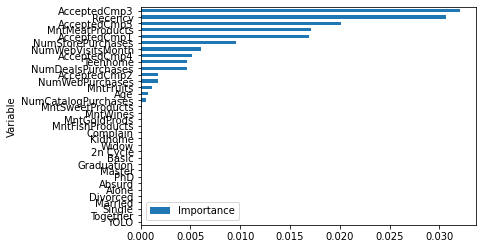

In [ ]:
# visualize feature importance
pd.DataFrame(r2_impact, columns=['Importance', 'Variable']). \
sort_values(by='Importance'). \
plot(x = 'Variable', y = 'Importance', kind = 'barh')

**Using Weight Plot**

In [ ]:
# check model weight/param
linear_reg_sm.params

array([ 1.34076013e-01, -5.17934633e-03, -5.69059611e-02, -2.15067746e-03,
       -2.17791773e-05,  4.10136574e-04,  3.63640720e-04, -7.73626037e-05,
       -1.56504149e-04,  6.75335407e-05,  1.66285374e-02,  7.11164053e-03,
        5.01415633e-03, -1.63182608e-02,  1.61780263e-02,  2.53323786e-01,
        1.11440161e-01,  2.51520734e-01,  2.21306464e-01,  1.35630133e-01,
       -2.64308798e-02,  9.00752331e-04,  2.27590610e-02, -4.57559987e-02,
        1.92783952e-02,  4.86443784e-02,  8.91501774e-02,  1.95899945e-02,
       -1.77139480e-02, -5.23294500e-02, -1.66769138e-01, -6.44239491e-02,
       -1.70590828e-01, -2.57716372e-02,  6.12084969e-01])

In [ ]:
# check weight standard error
linear_reg_sm.bse

array([5.41748973e-02, 1.88926267e-02, 1.72775418e-02, 2.54004728e-04,
       4.01301337e-05, 2.56362525e-04, 5.75073519e-05, 1.99807125e-04,
       2.46888533e-04, 1.71673175e-04, 5.06514811e-03, 3.52456056e-03,
       4.44028700e-03, 3.45847036e-03, 4.31027941e-03, 2.92751828e-02,
       3.20486462e-02, 3.66481404e-02, 3.51978920e-02, 6.67749366e-02,
       7.39851277e-02, 7.05818539e-04, 2.56065257e-02, 4.09720190e-02,
       1.75031647e-02, 2.13389949e-02, 2.03913289e-02, 1.90899170e-01,
       1.55581119e-01, 5.01434722e-02, 4.69789825e-02, 4.80852537e-02,
       4.76523045e-02, 5.85064675e-02, 2.61594728e-01])

In [ ]:
# create feature_weight dataframe
feature_weight = pd.DataFrame(
    {"var_name" : ["const", 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', '2n Cycle', 'Basic', 'Graduation',
       'Master', 'PhD', 'Absurd', 'Alone', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'YOLO'], 
     "coef" : linear_reg_sm.params, 
     "sd_er" : linear_reg_sm.params + linear_reg_sm.bse,
     }
)

# check feature weight
feature_weight

,var_name,coef,sd_er
0,const,0.134076,0.188251
1,Kidhome,-0.005179,0.013713
2,Teenhome,-0.056906,-0.039628
3,Recency,-0.002151,-0.001897
4,MntWines,-0.000022,0.000018
5,MntFruits,0.000410,0.000666
6,MntMeatProducts,0.000364,0.000421
7,MntFishProducts,-0.000077,0.000122
8,MntSweetProducts,-0.000157,0.000090
9,MntGoldProds,0.000068,0.000239


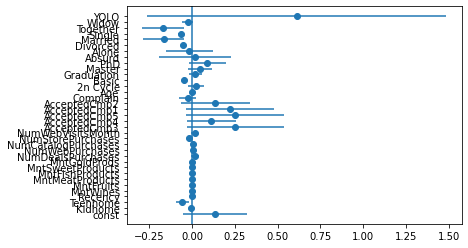

In [ ]:
# visualize weight with its standard error
plt.errorbar(feature_weight['coef'], feature_weight['var_name'], xerr = feature_weight['sd_er'], fmt='o')
plt.axvline(x=0)
plt.show()

#### Interpretasi

1. R-squared : Berdasarkan hasil tersebut, kita dapat mengatakan bahwa model kita menjelaskan 34,4% dari variabel target.
2. P>|t| : Variabel x2, x3, x6, x10, x11, x13, x14, x15, x16 x17, x18, x19, x25, x26, x30, x32, x34 mempengaruhi variabel dependen karena memiliki p-value < 0,05
3. Durbin-Watson: Model homoskedastisitas karena nilainya 2
4. Jarque-Bera dan Omnibus : Nilainya lebih besar dari 0 yang artinya distribusi dari residual tidak normal
5. Cond. No. : Nilainya tinggi artinya adanya multikolinearitas.
6. Nilai eror (MAPE) tidak terlalu tinggi yaitu sebesar 5.32%

Berdasarkan interpretasi model using feature importance diketahui bahwa faktor yang paling mempengaruhi seseorang untuk merespon campaign yaitu "AcceptedCmp3". Sedangkan using weight plot diketahui bahwa variabel "YOLO" berdampak besar pada seseorang dalam merespon campaign karena memiliki coef paling tinggi

### Logistics Regression

**Modeling using StatsModel**

In [ ]:
X_train_int = sm.add_constant(X_train)
logistic_reg_sm = sm.Logit(y_train, X_train_int).fit()

         Current function value: 0.258922
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
# check summary of model
logistic_reg_sm.summary2()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.386     
Dependent Variable:   y                  AIC:                877.9783  
Date:                 2022-04-20 03:01   BIC:                1054.7777 
No. Observations:     1568               Log-Likelihood:     -405.99   
Df Model:             32                 LL-Null:            -660.72   
Df Residuals:         1535               LLR p-value:        2.3532e-87
Converged:            0.0000             Scale:              1.0000    
No. Iterations:       35.0000                                          
-----------------------------------------------------------------------
       Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
-----------------------------------------------------------------------
const -0.3893  6966290.0376 -0.0000 1.0000 -13653677.9687 13653677.1902
x1     0.1387        0.2615  0.5303 0.5959        -0.3738        0.6511
x2    -0.9565        0.2415 -3.9600 0.0001        -1.4299       -0.4831
x3    -0.0272        0.0035 -7.7851 0.0000        -0.0340       -0.0203
x4    -0.0000        0.0004 -0.0576 0.9541        -0.0009        0.0008
x5     0.0032        0.0028  1.1324 0.2575        -0.0023        0.0086
x6     0.0031        0.0006  5.2560 0.0000         0.0019        0.0042
x7    -0.0001        0.0021 -0.0542 0.9568        -0.0043        0.0041
x8    -0.0016        0.0026 -0.6011 0.5478        -0.0066        0.0035
x9     0.0022        0.0019  1.2052 0.2281        -0.0014        0.0059
x10    0.1872        0.0600  3.1185 0.0018         0.0695        0.3048
x11    0.0704        0.0362  1.9438 0.0519        -0.0006        0.1414
x12    0.0789        0.0498  1.5856 0.1128        -0.0186        0.1765
x13   -0.1453        0.0405 -3.5873 0.0003        -0.2247       -0.0659
x14    0.1983        0.0517  3.8331 0.0001         0.0969        0.2997
x15    1.9008        0.2674  7.1090 0.0000         1.3768        2.4249
x16    1.0468        0.3346  3.1283 0.0018         0.3910        1.7027
x17    1.5730        0.3357  4.6865 0.0000         0.9152        2.2309
x18    1.3235        0.3301  4.0098 0.0001         0.6766        1.9704
x19    1.0095        0.6337  1.5929 0.1112        -0.2326        2.2516
x20   -0.8627        1.3919 -0.6198 0.5354        -3.5907        1.8653
x21    0.0117        0.0085  1.3765 0.1687        -0.0050        0.0284
x22   -0.1906           nan     nan    nan            nan           nan
x23   -1.1697           nan     nan    nan            nan           nan
x24   -0.0061           nan     nan    nan            nan           nan
x25    0.1956           nan     nan    nan            nan           nan
x26    0.7816           nan     nan    nan            nan           nan
x27   -2.4363 10045934.5234 -0.0000 1.0000 -19689672.2932 19689667.4207
x28   -2.4455 10045934.5234 -0.0000 1.0000 -19689672.3025 19689667.4115
x29   -2.5506 10045934.5234 -0.0000 1.0000 -19689672.4075 19689667.3064
x30   -3.9914 10045934.5234 -0.0000 1.0000 -19689673.8483 19689665.8656
x31   -2.7791 10045934.5234 -0.0000 1.0000 -19689672.6360 19689667.0779
x32   -4.0123 10045934.5234 -0.0000 1.0000 -19689673.8693 19689665.8446
x33   -2.5777 10045934.5234 -0.0000 1.0000 -19689672.4347 19689667.2792
x34   20.4036 10046331.2728  0.0000 1.0000 -19690427.0678 19690467.8750
=======================================================================

"""

In [ ]:
# check model coefficient
logistic_reg_sm.params

array([-3.89267476e-01,  1.38658001e-01, -9.56466561e-01, -2.71530044e-02,
       -2.47335410e-05,  3.15244477e-03,  3.07510706e-03, -1.15713504e-04,
       -1.55903117e-03,  2.24400485e-03,  1.87181489e-01,  7.04308882e-02,
        7.89276871e-02, -1.45306470e-01,  1.98306503e-01,  1.90083837e+00,
        1.04682069e+00,  1.57304273e+00,  1.32351003e+00,  1.00951517e+00,
       -8.62687386e-01,  1.17201872e-02, -1.90630714e-01, -1.16971609e+00,
       -6.14164970e-03,  1.95588532e-01,  7.81632297e-01, -2.43627553e+00,
       -2.44549690e+00, -2.55057484e+00, -3.99137500e+00, -2.77905910e+00,
       -4.01234520e+00, -2.57774103e+00,  2.04036007e+01])

**Modeling using Scikit-Learn**

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1000)

In [ ]:
# check model coefficient
logistic_reg.coef_

array([[ 0.00032224, -0.09962623, -0.02905952,  0.00119317,  0.00100074,
         0.00252976, -0.00229953, -0.00235433,  0.00040324,  0.08573165,
         0.11628966,  0.202622  , -0.2250243 ,  0.08764257,  0.13342805,
         0.07648906,  0.11329989,  0.12111386,  0.03492527, -0.00300533,
        -0.03309934, -0.01415069, -0.01359123, -0.06009919, -0.01204974,
         0.0539647 ,  0.00311265,  0.00256639,  0.05778516, -0.11667071,
         0.06535316, -0.0954444 ,  0.03403296,  0.00333861]])

In [ ]:
# check model intercept
logistic_reg.intercept_

array([-0.04597216])

**Model Evaluation**

In [ ]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.873802,0.456522,0.845238,0.665162,0.811707
recall,0.956294,0.210000,0.845238,0.583147,0.845238
f1-score,0.913189,0.287671,0.845238,0.600430,0.820106
support,572.000000,100.000000,0.845238,672.000000,672.000000


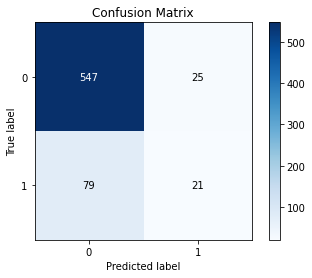

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


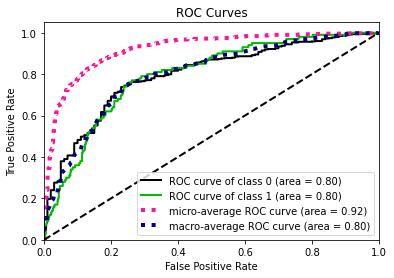

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

**Model Interpretation**

**Weight Plot**

In [ ]:
var_name = marketing_campaign.drop(['Response'], axis = 1).columns.tolist()

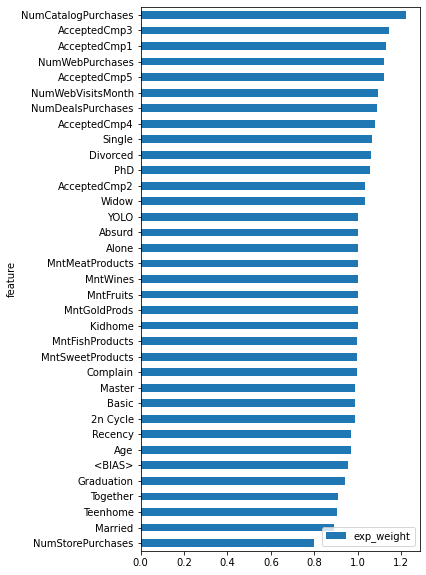

In [ ]:
# plt.rcParams["figure.figsize"] = (5,10)
eli5.explain_weights_df(
    logistic_reg, feature_names= var_name
).assign(
    # create new weight called exp_weight
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by = "exp_weight"
).plot(
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize = (5,10)
)

#### Interpretasi

1. Pseudo R-squared : Berdasarkan hasil tersebut, kita dapat mengatakan bahwa model kita menjelaskan 38,6% dari variabel target.
2. z-statistic : Variabel x2, x3, x6, x10, x13, x14, x15, x16, x17, x18 mempengaruhi variabel dependen karena nilainya < 0,05
3. Precision sebesar 0,46 artinya dari semua prediksi positif ada 46% prediksi yang benar
4. Recall sebesar 0,21 artinya semua data yang seharusnya bernilai positif ada 21% yang diprediksi tepat positif
5. F1-score sebesar 0,29 artinya rata-rata harmoni dari precision dan recall sebesar 29%
6. Model ini memiliki accuracy cukup tinggi sebesar 85%
7. Prediksi positif yang benar (True positive) sebanyak 21
8. Berdasarkan ROC Curve, model ini memiliki AUC sebesar 0,80 dimana letaknya berada diatas garis random classifier sehingga model ini sudah baik

Berdasarkan weight plot diketahui bahwa variabel "NumCaalogPurchase" berdampak besar pada seseorang dalam merespon campaign.

### K-Nearest Neighbors

**Modeling**

In [ ]:
# define k-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Model Evaluation**

In [ ]:
# prediction
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.880992,0.417910,0.834821,0.649451,0.812081
recall,0.931818,0.280000,0.834821,0.605909,0.834821
f1-score,0.905692,0.335329,0.834821,0.620511,0.820817
support,572.000000,100.000000,0.834821,672.000000,672.000000


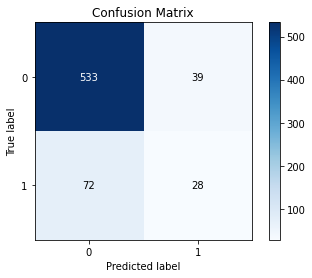

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


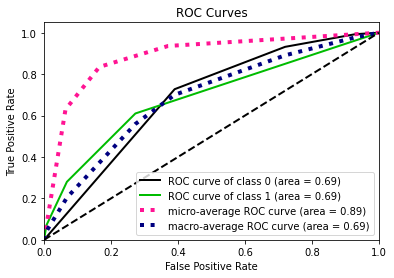

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

#### Interpretasi

1. Precision sebesar 0,42 artinya dari semua prediksi positif ada 42% prediksi yang benar
2. Recall sebesar 0,28 artinya semua data yang seharusnya bernilai positif ada 28% yang diprediksi tepat positif
3. F1-score sebesar 0,36 artinya rata-rata harmoni dari precision dan recall sebesar 36%
4. Model ini memiliki accuracy cukup tinggi sebesar 83%
5. Prediksi positif yang benar (True positive) sebanyak 28
6. Berdasarkan ROC Curve, model ini memiliki AUC sebesar 0,69 dimana letaknya berada diatas garis random classifier sehingga model ini sudah baik

### Decision Tree

**Modeling**

In [ ]:
# define decision tree classifier
tree_clf = DecisionTreeClassifier(random_state = 1000, max_depth = 5)
# fit model to data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1000)

**Model Evaluation**

In [ ]:
# prediction
pred_result = tree_clf.predict(X_test)
pred_proba_result = tree_clf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.889803,0.515625,0.854167,0.702714,0.834121
recall,0.945804,0.330000,0.854167,0.637902,0.854167
f1-score,0.916949,0.402439,0.854167,0.659694,0.840385
support,572.000000,100.000000,0.854167,672.000000,672.000000


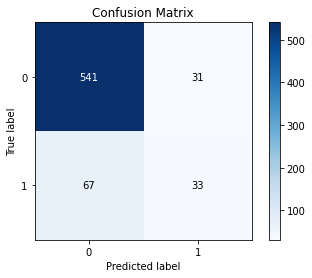

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


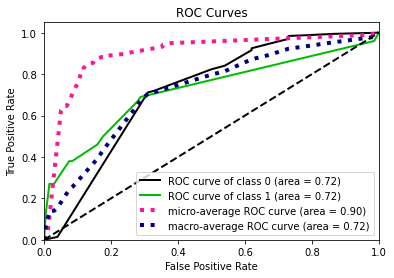

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

**Model Interpretation**

**Tree Visualization using Scikit-Learn**

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)

In [ ]:
var_name = marketing_campaign.drop(['Response'], axis = 1).columns.tolist()

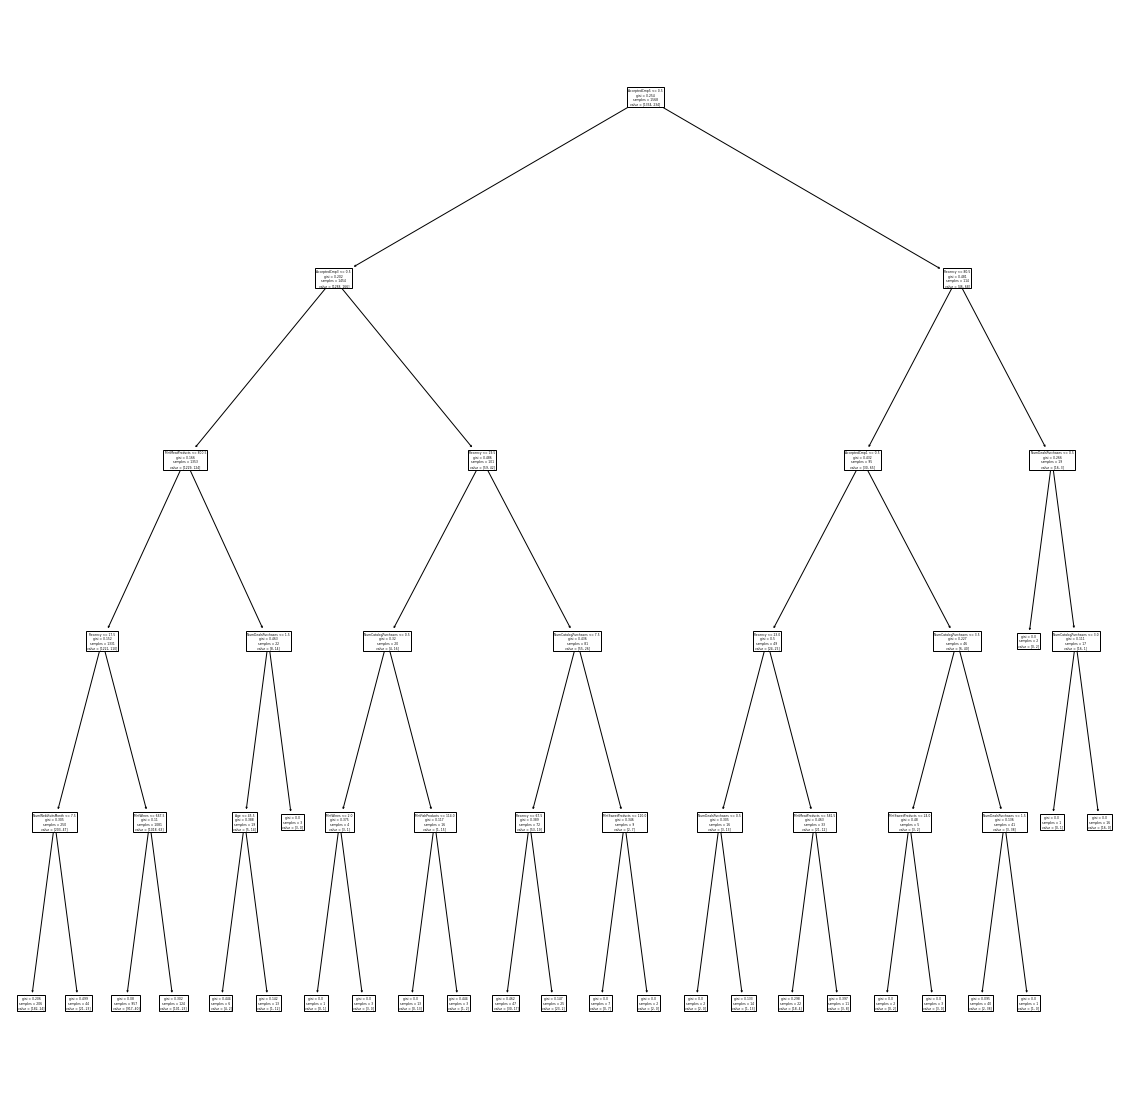

In [ ]:
plot_tree(tree_clf, feature_names = var_name)
plt.show()

**Tree Visualization using ELI5**

In [ ]:
eli5.sklearn.explain_decision_tree(tree_clf, feature_names=var_name)

Weight,Feature
0.2862,AcceptedCmp5
0.1740,Recency
0.1149,AcceptedCmp3
0.1026,MntMeatProducts
0.0696,NumWebVisitsMonth
0.0675,NumCatalogPurchases
0.0626,NumDealsPurchases
0.0357,AcceptedCmp1
0.0351,MntWines
0.0321,MntSweetProducts


In [ ]:
# reset figsize
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

**Gini Feature Importance**

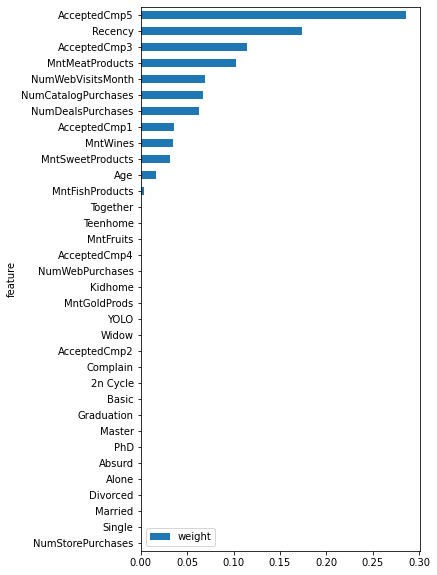

In [ ]:
eli5.explain_weights_df(tree_clf, feature_names=var_name). \
  sort_values(by='weight'). \
  plot(
    x = 'feature', 
    y = 'weight',
    kind = 'barh',
    figsize = (5, 10)
  )

**Decision Rules**

In [ ]:
print(export_text(tree_clf, feature_names = var_name))

|--- AcceptedCmp5 <= 0.50
|   |--- AcceptedCmp3 <= 0.50
|   |   |--- MntMeatProducts <= 800.50
|   |   |   |--- Recency <= 17.50
|   |   |   |   |--- NumWebVisitsMonth <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- NumWebVisitsMonth >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Recency >  17.50
|   |   |   |   |--- MntWines <= 667.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MntWines >  667.50
|   |   |   |   |   |--- class: 0
|   |   |--- MntMeatProducts >  800.50
|   |   |   |--- NumDealsPurchases <= 1.50
|   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  45.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- NumDealsPurchases >  1.50
|   |   |   |   |--- class: 0
|   |--- AcceptedCmp3 >  0.50
|   |   |--- Recency <= 19.50
|   |   |   |--- NumCatalogPurchases <= 0.50
|   |   |   |   |--- MntWines <= 2.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MntWines >  2.00
|   |   |   |   |   |

#### Interpretasi

1. Precision sebesar 0,52 artinya dari semua prediksi positif ada 52% prediksi yang benar
2. Recall sebesar 0,33 artinya semua data yang seharusnya bernilai positif ada 33% yang diprediksi tepat positif
3. F1-score sebesar 0,40 artinya rata-rata harmoni dari precision dan recall sebesar 40%
4. Model ini memiliki accuracy cukup tinggi sebesar 85%
5. Prediksi positif yang benar (True positive) sebanyak 33
6. Berdasarkan ROC Curve, model ini memiliki AUC sebesar 0,72 dimana letaknya berada diatas garis random classifier sehingga model ini sudah baik

Berdasarkan interpretasi model Tree Visualization using ELI5 diketahui bahwa faktor yang paling mempengaruhi seseorang untuk merespon campaign yaitu "AcceptedCmp5" sebesar 0.29. Sama seperti pada Gini Feature Importance, variabel "AcceptedCmp5" berdampak besar pada seseorang dalam merespon campaign. Sedangkan berdasarkan decision rules, prediksi akan bernilai 0 apabila :
1. AcceptedCmp5 <= 0.50
2. AcceptedCmp3 <= 0.50
3. MntMeatProducts <= 800.50
4. Recency <= 17.50
5. NumWebVisitsMonth <= 7.50

### Random Forest

**Modeling**

In [ ]:
# define Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1000)
# fit model to data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

**Model Evaluation**

In [ ]:
# prediction
pred_result = rf_clf.predict(X_test)
pred_proba_result = rf_clf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.885714,0.666667,0.872024,0.776190,0.853118
recall,0.975524,0.280000,0.872024,0.627762,0.872024
f1-score,0.928453,0.394366,0.872024,0.661409,0.848975
support,572.000000,100.000000,0.872024,672.000000,672.000000


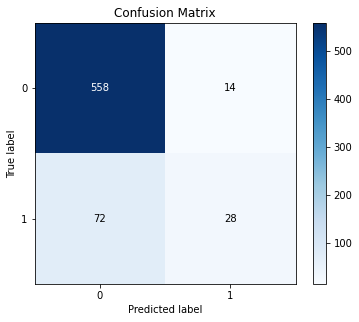

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


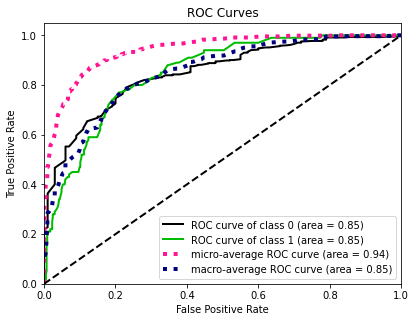

In [ ]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

**Model Interpretation**

In [ ]:
#Balanced dataset by oversampling
count_response_0, count_response_1 = marketing_campaign.Response.value_counts()
print(count_response_0)
print(count_response_1)

marketing_campaign_0 = marketing_campaign[marketing_campaign["Response"] == 0]
marketing_campaign_1 = marketing_campaign[marketing_campaign["Response"] == 1]

marketing_campaign_1_over = marketing_campaign_1.sample(n = count_response_0, replace = True)
marketing_campaign_1_over.shape

1906
334


(1906, 35)

In [ ]:
marketing_campaign_resampling = pd.concat([marketing_campaign_1_over, marketing_campaign_0], axis = 0)

In [ ]:
feature = ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', '2n Cycle', 'Basic', 'Graduation',
       'Master', 'PhD', 'Absurd', 'Alone', 'Divorced', 'Married', 'Single',
       'Together', 'Widow', 'YOLO'] 

In [ ]:
# split the train and test dataset

X = marketing_campaign_resampling[feature]
y = marketing_campaign_resampling.Response

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4, random_state = 123)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc = RandomForestClassifier(n_estimators=30,
                             random_state=1)

max_depth_range = range(1,16)
param_grid = dict(max_depth=max_depth_range)

grid = GridSearchCV(rfc,
                    param_grid,
                    cv = 10,
                    scoring = 'accuracy')

grid.fit(X_train, y_train)


grid.cv_results_

{'mean_fit_time': array([0.06038742, 0.11340299, 0.1051681 , 0.07321064, 0.08281205,
        0.0835686 , 0.08757184, 0.09732912, 0.10134399, 0.10034091,
        0.10240867, 0.10124855, 0.10777197, 0.10527494, 0.10493176]),
 'mean_score_time': array([0.00691681, 0.01602607, 0.01049123, 0.00646176, 0.00689001,
        0.00736494, 0.00741498, 0.00774927, 0.00738914, 0.00758047,
        0.00735998, 0.00724773, 0.00760922, 0.00749061, 0.0072494 ]),
 'mean_test_score': array([0.72147016, 0.74159006, 0.76037501, 0.79842373, 0.82508236,
        0.85528423, 0.8710239 , 0.89594729, 0.91561518, 0.92084961,
        0.93047767, 0.93616793, 0.94097525, 0.94491496, 0.94666552]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_

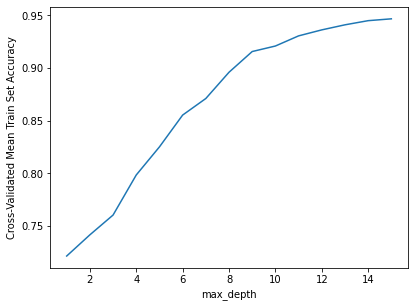

In [ ]:
import seaborn as sns
grid_mean_scores = grid.cv_results_["mean_test_score"]
grid_test_mean_scores = metrics
# plot the results
sns.mpl.pyplot.plot(max_depth_range, grid_mean_scores)
sns.mpl.pyplot.xlabel('max_depth')
sns.mpl.pyplot.ylabel('Cross-Validated Mean Train Set Accuracy');

In [ ]:
best_rfc = RandomForestClassifier(n_estimators=50,
                                  random_state=1,
                                  max_depth = 12)
best_rfc.fit(X_train, y_train)

rfc_pred = best_rfc.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, best_rfc.predict(X_train))
accuracy_test = metrics.accuracy_score(y_test, rfc_pred)
print("Accuracy of Random Forest train is: ", accuracy_train)
print("Accuracy of Random Forest test is: ", accuracy_test)

Accuracy of Random Forest train is:  0.9921294271972015
Accuracy of Random Forest test is:  0.9449180327868852


In [ ]:
# compute feature importances
pd.DataFrame({'feature':feature, 'importance':best_rfc.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
2,Recency,0.118114
5,MntMeatProducts,0.089694
3,MntWines,0.079556
11,NumCatalogPurchases,0.067624
8,MntGoldProds,0.065879
13,NumWebVisitsMonth,0.050432
7,MntSweetProducts,0.047802
14,AcceptedCmp3,0.046361
6,MntFishProducts,0.045050
20,Age,0.042321


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
DecisionTree_cross_val = DecisionTreeClassifier(max_depth=10, random_state=10)
DecisionTree_cross_val.fit(X_train, y_train)
cross_val_scores = cross_val_score(DecisionTree_cross_val, X_train, y_train, cv = 10)
print("10-fold accuracies:\n",cross_val_scores)
print("10-fold mean accuracy:\n",cross_val_scores.mean())

10-fold accuracies:
 [0.81659389 0.88646288 0.82969432 0.86462882 0.88209607 0.86462882
 0.82532751 0.87280702 0.9122807  0.92105263]
10-fold mean accuracy:
 0.8675572665287673


In [ ]:
y_test_pred_rcf = best_rfc.predict(X_test)

In [ ]:
print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred_rcf))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       750
           1       0.94      0.95      0.95       775

    accuracy                           0.94      1525
   macro avg       0.95      0.94      0.94      1525
weighted avg       0.94      0.94      0.94      1525



In [ ]:
pred_probs_rcf =  best_rfc.predict_proba(X_test)
pred_probs_rcf

array([[0.84139433, 0.15860567],
       [0.47399582, 0.52600418],
       [0.91633518, 0.08366482],
       ...,
       [0.92133519, 0.07866481],
       [0.24261124, 0.75738876],
       [0.0933571 , 0.9066429 ]])

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_probs_rcf[:,1])

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

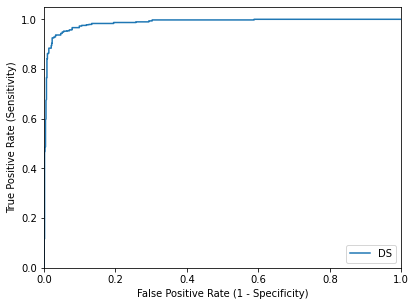

In [ ]:
sns.mpl.pyplot.plot(fpr, tpr,label="DS")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

In [ ]:
print("Test AUC: ",metrics.roc_auc_score(y_test, best_rfc.predict(X_test)))

Test AUC:  0.9447956989247311


#### Interpretasi

1. Precision sebesar 0,67 artinya dari semua prediksi positif ada 67% prediksi yang benar
2. Recall sebesar 0,28 artinya semua data yang seharusnya bernilai positif ada 28% yang diprediksi tepat positif
3. F1-score sebesar 0,39 artinya rata-rata harmoni dari precision dan recall sebesar 39%
4. Model ini memiliki accuracy cukup tinggi sebesar 87%
5. Prediksi positif yang benar (True positive) sebanyak 28
6. Berdasarkan ROC Curve, model ini memiliki AUC sebesar 0,85 dimana letaknya berada diatas garis random classifier sehingga model ini sudah baik

Berdasarkan interpretasi model Random Forest diketahui bahwa feature yang memilik nilai importance tertinggi yaitu Recency sebesar 0,12.

### RuleFit

**Modeling**

In [ ]:
# define RuleFit model
rulefit_clf = SkopeRules(
    n_estimators = 10,
    random_state = 1000,
    max_features = 'sqrt',
    feature_names = var_name
)

# fit model to data
rulefit_clf.fit(X_train, y_train)

SkopeRules(feature_names=['Kidhome', 'Teenhome', 'Recency', 'MntWines',
                          'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                          'MntSweetProducts', 'MntGoldProds',
                          'NumDealsPurchases', 'NumWebPurchases',
                          'NumCatalogPurchases', 'NumStorePurchases',
                          'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                          'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                          'Complain', 'Age', '2n Cycle', 'Basic', 'Graduation',
                          'Master', 'PhD', 'Absurd', 'Alone', 'Divorced',
                          'Married', ...],
           max_features='sqrt', random_state=1000)

In [ ]:
rulefit_clf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1970544363),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1077348022),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=473922508),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2113565594),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1173624936),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1474976016),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1528487102),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1071226617),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=499256588),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=9065945

**Model Evaluation**

In [ ]:
# prediction
pred_result = rulefit_clf.predict(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.962500,0.563370,0.605246,0.762935,0.759663
recall,0.205333,0.992258,0.605246,0.598796,0.605246
f1-score,0.338462,0.718692,0.605246,0.528577,0.531693
support,750.000000,775.000000,0.605246,1525.000000,1525.000000


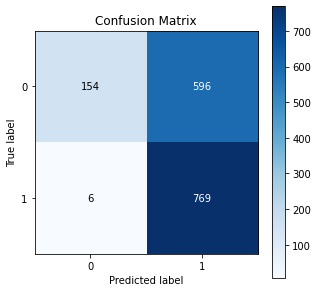

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result, figsize=(5,5));

In [ ]:
# check ROC-AUC Curve
scoring = rulefit_clf.score_top_rules(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, scoring)

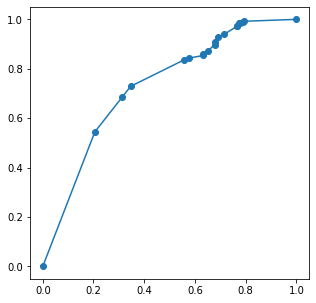

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr, 'o-')
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

0.7301918279569892

**Model Interpretation**

**Rules Extraction**

In [ ]:
# extract rules from rule-fit model
rulefit_clf.rules_

[('NumCatalogPurchases > 0.5 and Recency <= 44.5 and MntGoldProds > 14.5',
  (0.727015558698727, 0.5673289183222958, 2)),
 ('Recency <= 80.5 and MntGoldProds > 15.5 and NumDealsPurchases <= 1.5',
  (0.7291311754684838, 0.47345132743362833, 2)),
 ('Teenhome <= 0.5 and NumWebPurchases > 2.5 and MntWines > 501.0',
  (0.8123515439429929, 0.3787375415282392, 2)),
 ('AcceptedCmp1 <= 0.5 and MntFruits > 3.5 and MntGoldProds > 12.5',
  (0.5074798619102416, 0.48355263157894735, 2)),
 ('NumStorePurchases > 4.5 and AcceptedCmp2 <= 0.5 and MntWines > 666.5',
  (0.7542997542997543, 0.3414905450500556, 2)),
 ('Teenhome <= 0.5 and NumWebPurchases > 2.5 and AcceptedCmp1 <= 0.5',
  (0.5951972555746141, 0.3842746400885936, 2)),
 ('AcceptedCmp5 > 0.5 and Recency <= 84.5 and MntWines <= 1492.5',
  (0.9051094890510949, 0.27464008859357697, 2)),
 ('NumCatalogPurchases > 3.5 and NumStorePurchases > 2.5 and AcceptedCmp5 <= 0.5',
  (0.5714285714285714, 0.3183856502242152, 2)),
 ('AcceptedCmp5 > 0.5 and Recency

In [ ]:
print('The 5 most performing "churn rules" are the following one:\n')
for i_rule, rule in enumerate(rulefit_clf.rules_[:5]):
    print(rule[0])

The 5 most performing "churn rules" are the following one:

NumCatalogPurchases > 0.5 and Recency <= 44.5 and MntGoldProds > 14.5
Recency <= 80.5 and MntGoldProds > 15.5 and NumDealsPurchases <= 1.5
Teenhome <= 0.5 and NumWebPurchases > 2.5 and MntWines > 501.0
AcceptedCmp1 <= 0.5 and MntFruits > 3.5 and MntGoldProds > 12.5
NumStorePurchases > 4.5 and AcceptedCmp2 <= 0.5 and MntWines > 666.5


**Rules Importance**

In [ ]:
# extract rules and its importance
rules = []
evaluation = []
for result in rulefit_clf.rules_:
  rl, evl = result
  rules.append(rl)
  evaluation.append(evl[0])

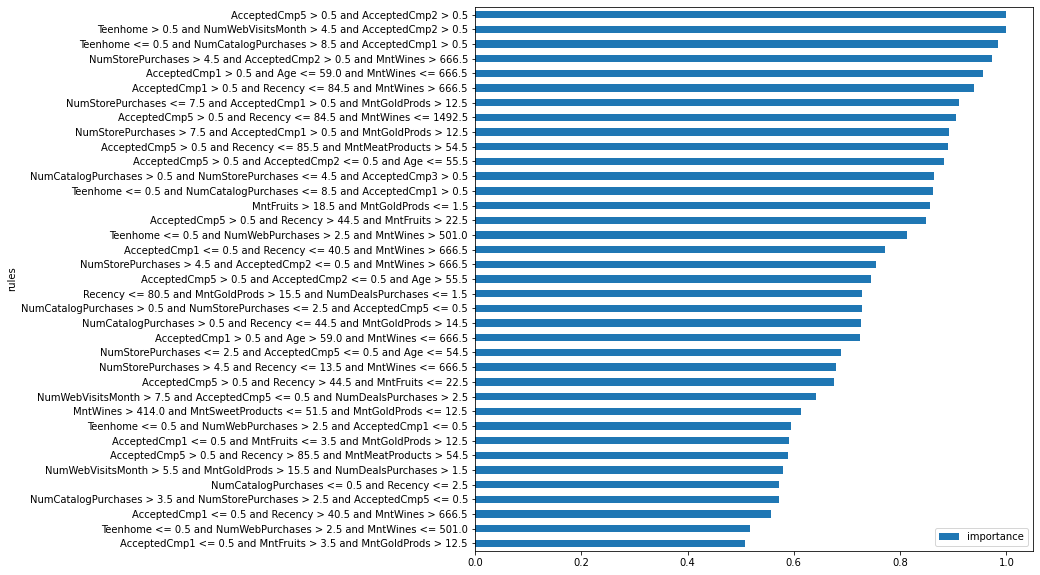

In [ ]:
# visualize
pd.DataFrame(
    {"rules": rules, "importance": evaluation}
).sort_values(
    by = "importance"
).plot(
    x = "rules",
    y = "importance",
    kind = 'barh',
    figsize = (10, 10)
);

#### Interpretasi

1. Precision sebesar 0,56 artinya dari semua prediksi positif ada 56% prediksi yang benar
2. Recall sebesar 0,99 artinya semua data yang seharusnya bernilai positif ada 99% yang diprediksi tepat positif
3. F1-score sebesar 0,72 artinya rata-rata harmoni dari precision dan recall sebesar 72%
4. Model ini memiliki accuracy cukup tinggi sebesar 61%
5. Prediksi positif yang benar (True positive) sebanyak 769
6. Berdasarkan ROC Curve, model ini memiliki AUC sebesar 0,73

Berdasarkan interpretasi model Rules Extraction diketahui bahwa rules yang memilik nilai importance tertinggi yaitu "NumCatalogPurchases > 0.5 and Recency <= 44.5 and MntGoldProds > 14.5". Sedangkan berdasarkan Rule Importance, "AcceptedCmp5 > 0.5 and AcceptedCmp2 > 0.5" memiliki importance lebih tinggi dibandingkan rules yang lain.

### MODEL TERBAIK

Dari semua model mechine learning yang saya buat, model terbaik yaitu "random forest". Alasannya :
1. Precision sebesar 0,64 artinya dari semua prediksi positif ada 64% prediksi yang benar
2. Recall sebesar 0,28 artinya semua data yang seharusnya bernilai positif ada 28% yang diprediksi tepat positif
3. F1-score sebesar 0,39 artinya rata-rata harmoni dari precision dan recall sebesar 39%
4. Model ini memiliki accuracy cukup tinggi sebesar 87%
5. Prediksi positif yang benar (True positive) sebanyak 28
6. Berdasarkan ROC Curve, model ini memiliki AUC sebesar 0,85 dimana letaknya berada diatas garis random classifier sehingga model ini sudah baik

Berdasarkan interpretasi model Random Forest diketahui bahwa feature yang memilik nilai importance tertinggi yaitu Recency sebesar 0,12. Fitur "Recency" mewakili jumlah hari sejak pembelian terakhir. Feature ini yang akan mewakili jenis hari (Weekday atau Weekend), pada event tertentu, awal bulan, akhir bulan, dll.

Rekomendasi : Tim marketing perlu membuat campaign pada hari-hari tertentu sesuai hasil model agar seseorang tertarik dalam merespon marketing campaign karena sesuai hasil model random forest, feature "Recency" memiliki nilai importance tertinggi.